# Assignment 2
## Due May 3rd

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Exercise 1

Here we define the function that will generate our data

In [2]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset and plot it

In [3]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

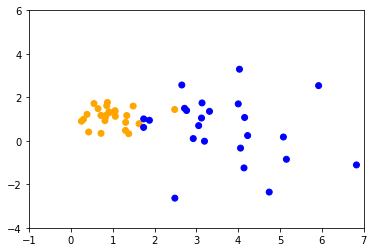

In [4]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset and plot it

In [5]:
test_n1, test_n2 = 100, 100
test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

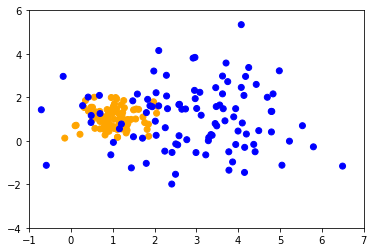

In [6]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$ and plot the result

In [7]:
def knnClassify(train_data, train_labels, test_data, k=1):
    pred_labels = []
    for point in test_data: 
        dist = np.sqrt(np.sum((point - train_data)**2, axis=1))
        sort_index = np.argsort(dist)
        labels = list(train_labels[sort_index[:k]])
        if labels.count(1) > labels.count(2):
            pred_label = 1
        else: 
            pred_label = 2
        pred_labels.append(pred_label)
    return pred_labels 

In [8]:
labels = knnClassify(train_data, train_labels, test_data, k=3)

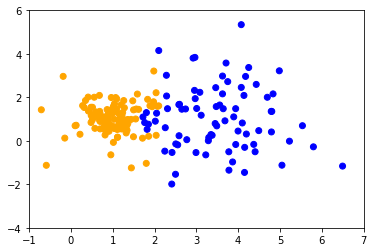

In [9]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## c)

Plot the correct predictions in black and the wrong one in red

In [8]:
# correct_preds = 

## d)

define the empirical risk with 0-1-loss and compute the 0-1 loss for the labels predicted above

In [9]:
def empRiskWith01loss(test_labels, pred_labels):
   
    Pass

In [10]:
empRiskWith01loss(test_labels, pred_labels)

NameError: name 'test_labels' is not defined

Compute the risk for various k and plot it

In [1]:
ks = [1, 3, 5, 7, 10, 15, 20]

### e)

Create train dataset with n1 = n2 = 500, plot it and repeat the same analysis as in d)

In [36]:
# train_n1, train_n2 = 
# train_data, train_labels = 

### f)

Create train dataset with n1 = n2 = 1000, plot it and repeat the same analysis as in d)

In [11]:
# train_n1, train_n2
# train_data, train_labels = 

# Exercise 2
Load data and show one class

In [10]:
train_df = pd.read_csv('train.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).as_matrix()
train_labels = train_df['Label'].as_matrix()
test_df = pd.read_csv('test.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).as_matrix()
test_labels = test_df['Label'].as_matrix()

## a.) See, whether datasets are balanced 

In [23]:
# find out if training is balanced: 
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

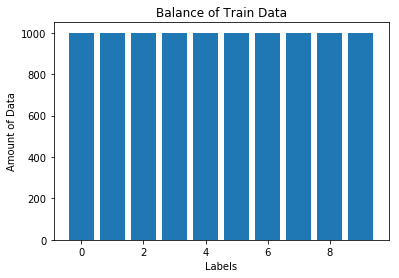

In [24]:
fig = plt.figure()
plt.bar(unique, counts)
plt.xlabel('Labels')
plt.ylabel('Amount of Data')
plt.title('Balance of Train Data')
plt.show()

In [13]:
# find out if testing is balanced: 
unique1, counts1 = np.unique(test_labels, return_counts=True)
dict(zip(unique1, counts1))

{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100}

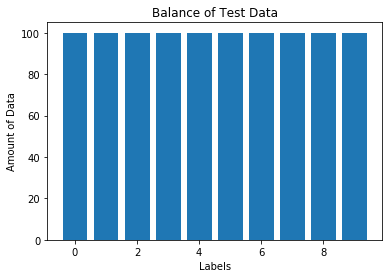

In [21]:
fig = plt.figure()
plt.bar(unique1, counts1)
plt.xlabel('Labels')
plt.ylabel('Amount of Data')
plt.title('Balance of Test Data')
plt.show()

## b.) Use kNN Classifier

In [25]:
# k = 1 

pred_labels = knnClassify(train_data, train_labels, test_data, k=1)

In [26]:
pred_labels = knnClassify(train_data, train_labels, test_data, k=3)

In [83]:
def knnClassifyEfficient(train_data, train_labels, test_data, k=1):
    pred_labels = []
    dist = euclidean_distances(test_data, train_data)
    for i in range(len(test_data)):
        sort_index = np.argsort(dist[i])
        labels = list(train_labels[sort_index[:k]])
        unique, count = np.unique(labels, return_counts = True)
        dict_labels = dict(zip(unique, count))
        max_label = max(dict_labels, key=dict_labels.get)
        pred_labels.append(max_label)
    return pred_labels 

In [84]:
pred_labels = knnClassifyEfficient(train_data, train_labels, test_data, k=1)

In [82]:
len(pred_labels)

1000